
## Data Preprocessing Overview

*by Grace*

In data science, preprocessing is a crucial step that ensures the quality and integrity of data before feeding it to a machine learning model. Clean and well-prepared data can lead to better model performance and more accurate insights. This document will walk you through the key steps I undertook in the preprocessing phase.

### 1. **Data Transformation**
- **Objective:** Convert data into a suitable format or structure for analysis. This may involve scaling, encoding categorical variables, or other transformations.
  
### 2. **Outlier Detection**
- **Objective:** Identify and address extreme values that can adversely affect the performance of a machine learning model.
- **Method:** Use the Interquartile Range (IQR) and box plots to visually identify outliers. This method is robust for data with non-Gaussian distributions.
- **Next Steps:** Upon detection, outliers can be removed or imputed, depending on the data context and the potential impact on the analysis.
  
### 3. **Imputation of Missing Values**
- **Objective:** Handle missing data to prevent potential bias or misrepresentation in the analysis.
- **Method:** Use the mean of the feature to fill missing values. This approach assumes that the missingness is random and that the mean is a good representation for the missing value.
  
### 4. **Correlation Analysis**
- **Objective:** Understand the relationships between different features and between features and the target outcome.
- **Methods:** 
  - **Between-feature Correlation:** Analyse how different features relate to one another. This helps in understanding potential multicollinearity and redundancy.
  - **Feature-and-outcome Correlation:** Analyse how individual features relate to the target variable. This provides insights into which features might be most predictive.
  
### 5. **Feature Selection**
- **Objective:** Select the most relevant features for the model to prevent overfitting and reduce computational costs.
- **Methods:** 
  - **Point-biserial Correlation:** Used for binary outcome variable and continuous predictor variables. It provides insights into the linear relationship between the feature and the outcome.
  - **Logistic Regression:** By assessing the significance of each feature's coefficient in predicting a binary outcome, we can gauge the importance of each feature in the context of the model.



In [36]:
import pandas as pd


In [37]:
clinic_df = pd.read_csv('../data/clinic_df.csv')
lab_df = pd.read_csv('../data/lab_df.csv')


In [38]:
clinic_df

,Unnamed: 0,subject_id,gender,age,clinic_itemid,clinic_label,clinic_val,clinic_unit,dod
0,0,18539548,M,85,226763,HrApacheIIScore,0.0,NaN,2178-09-05
1,1,19305113,M,51,226763,HrApacheIIScore,2.0,NaN,2129-08-08
2,2,18770897,F,54,226763,HrApacheIIScore,3.0,NaN,NaN
3,3,10285325,M,69,220210,Respiratory Rate,27.0,insp/min,2160-08-18
4,4,10342123,M,81,220210,Respiratory Rate,22.0,insp/min,2163-10-30
...,...,...,...,...,...,...,...,...,...
30923,30923,19613511,M,19,220051,Arterial Blood Pressure diastolic,76.0,mmHg,NaN
30924,30924,19723120,M,81,220051,Arterial Blood Pressure diastolic,79.0,mmHg,NaN
30925,30925,19753816,F,61,220051,Arterial Blood Pressure diastolic,59.0,mmHg,2192-12-27
30926,30926,19896141,M,86,220051,Arterial Blood Pressure diastolic,50.0,mmHg,2170-10-07


In [39]:
lab_df


,Unnamed: 0,subject_id,gender,age,lab_label,lab_itemid,lab_val,lab_unit,dod
0,0,18487334,M,68,White Blood Cells,51755,6.8,K/uL,NaN
1,1,16233087,M,71,White Blood Cells,51755,10.5,K/uL,NaN
2,2,10013643,F,79,PT,51274,10.9,sec,NaN
3,3,10055235,M,31,PT,51274,12.2,sec,NaN
4,4,10236108,M,64,PT,51274,12.6,sec,NaN
...,...,...,...,...,...,...,...,...,...
83930,83930,18546142,F,79,"Potassium, Whole Blood",50822,4.9,mEq/L,2136-10-02
83931,83931,19319058,F,44,"Potassium, Whole Blood",50822,3.4,mEq/L,NaN
83932,83932,19431477,F,89,"Potassium, Whole Blood",50822,4.3,mEq/L,NaN
83933,83933,19517316,M,40,"Potassium, Whole Blood",50822,3.7,mEq/L,NaN


## 1. Data Transformation


In [40]:
clinic_df

,Unnamed: 0,subject_id,gender,age,clinic_itemid,clinic_label,clinic_val,clinic_unit,dod
0,0,18539548,M,85,226763,HrApacheIIScore,0.0,NaN,2178-09-05
1,1,19305113,M,51,226763,HrApacheIIScore,2.0,NaN,2129-08-08
2,2,18770897,F,54,226763,HrApacheIIScore,3.0,NaN,NaN
3,3,10285325,M,69,220210,Respiratory Rate,27.0,insp/min,2160-08-18
4,4,10342123,M,81,220210,Respiratory Rate,22.0,insp/min,2163-10-30
...,...,...,...,...,...,...,...,...,...
30923,30923,19613511,M,19,220051,Arterial Blood Pressure diastolic,76.0,mmHg,NaN
30924,30924,19723120,M,81,220051,Arterial Blood Pressure diastolic,79.0,mmHg,NaN
30925,30925,19753816,F,61,220051,Arterial Blood Pressure diastolic,59.0,mmHg,2192-12-27
30926,30926,19896141,M,86,220051,Arterial Blood Pressure diastolic,50.0,mmHg,2170-10-07


In [41]:

df = clinic_df
# Pivoting the data
df_pivot = df.pivot(index='subject_id', columns='clinic_label', values='clinic_val').reset_index()

# Merging the pivoted data with original data to get the non-pivoted columns (like gender, age, etc.)
df_merged_clinic = pd.merge(df[['subject_id', 'gender', 'age']].drop_duplicates(), df_pivot, on='subject_id')

df_merged_clinic

,subject_id,gender,age,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,HrApacheIIScore,Respiratory Rate
0,18539548,M,85,71.0,111.0,86.0,120.0,0.0,23.0
1,19305113,M,51,65.0,105.0,95.0,120.0,2.0,12.0
2,18770897,F,54,65.0,106.0,48.0,100.0,3.0,17.0
3,10285325,M,69,75.0,158.0,86.0,120.0,NaN,27.0
4,10342123,M,81,50.0,114.0,102.0,140.0,NaN,22.0
...,...,...,...,...,...,...,...,...,...
6181,19660100,F,68,61.0,108.0,95.0,120.0,NaN,23.0
6182,19917043,F,61,72.0,117.0,90.0,120.0,NaN,17.0
6183,10103536,M,50,69.0,107.0,63.0,130.0,NaN,NaN
6184,14813765,F,54,98.0,139.0,97.0,130.0,NaN,NaN


In [42]:
df = lab_df
# Pivoting the data
df_pivot = df.pivot(index='subject_id', columns='lab_label', values='lab_val').reset_index()

# Merging the pivoted data with original data to get the non-pivoted columns (like gender, age, etc.)
df_merged_lab = pd.merge(df[['subject_id', 'gender', 'age']].drop_duplicates(), df_pivot, on='subject_id')

df_merged_lab

,subject_id,gender,age,Anion Gap,Bicarbonate,Chloride,Creatinine,Glucose,Hemoglobin,MCH,MCHC,PT,"Potassium, Whole Blood",RBC,RDW,Sodium,Temperature,Urea Nitrogen,White Blood Cells
0,18487334,M,68,20.0,23.0,101.0,0.8,117.0,NaN,32.1,33.2,11.4,3.4,1.0,12.0,138.0,36.8,13.0,6.8
1,16233087,M,71,15.0,25.0,101.0,1.4,282.0,9.0,29.0,32.2,12.8,4.9,2.0,16.2,137.0,36.9,41.0,10.5
2,10013643,F,79,14.0,24.0,106.0,0.6,83.0,11.7,28.6,32.3,10.9,3.7,0.0,15.0,139.0,36.9,16.0,NaN
3,10055235,M,31,10.0,22.0,97.0,0.4,100.0,NaN,28.8,31.6,12.2,3.9,1.0,15.2,134.0,NaN,15.0,NaN
4,10236108,M,64,13.0,20.0,108.0,0.8,NaN,NaN,31.0,32.4,12.6,3.9,66.0,12.0,146.0,37.1,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6177,17653194,F,54,13.0,27.0,106.0,0.4,128.0,12.5,32.8,33.2,NaN,3.6,NaN,13.6,142.0,NaN,9.0,NaN
6178,18686436,F,50,10.0,18.0,107.0,0.7,NaN,NaN,27.9,31.6,NaN,NaN,NaN,12.9,140.0,NaN,12.0,NaN
6179,10501044,F,64,15.0,38.0,103.0,1.1,143.0,12.3,33.2,34.4,NaN,5.2,8.0,13.3,138.0,NaN,12.0,NaN
6180,13244557,F,68,10.0,24.0,107.0,1.0,NaN,NaN,26.8,29.9,NaN,NaN,NaN,15.4,144.0,NaN,20.0,NaN


In [43]:

df = clinic_df
# Pivoting the data
df_pivot = df.pivot(index='subject_id', columns='clinic_label', values='clinic_val').reset_index()

# Merging the pivoted data with original data to get the non-pivoted columns (like gender, age, etc.)
df_demographic = pd.merge(df[['subject_id', 'gender', 'age','dod']].drop_duplicates(), df_pivot, on='subject_id')

df_demographic = df_demographic[['subject_id', 'gender','dod']]
df_demographic['dod'] = df_demographic['dod'].notna().astype(int)
df_demographic['gender'] = df_demographic['gender'].replace({'M': 0, 'F': 1})
df_demographic

,subject_id,gender,dod
0,18539548,0,1
1,19305113,0,1
2,18770897,1,0
3,10285325,0,1
4,10342123,0,1
...,...,...,...
6181,19660100,1,1
6182,19917043,1,0
6183,10103536,0,0
6184,14813765,1,0


## 2. EDA 
exploratory data analysis

### summary

In [44]:
print("Clinic Data:")
df_merged_clinic.describe()


Clinic Data:


,subject_id,age,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,HrApacheIIScore,Respiratory Rate
count,6.186000e+03,6186.000000,6186.000000,6186.000000,6186.000000,6184.000000,3.000000,6183.000000
mean,1.500769e+07,63.691400,63.578888,127.387003,84.157614,124.788163,1.666667,19.495067
std,2.885050e+06,16.518234,89.315312,24.725080,17.897532,152.539899,1.527525,7.523667
min,1.000235e+07,18.000000,0.000000,11.000000,0.000000,12.000000,0.000000,0.000000
25%,1.252613e+07,54.000000,52.000000,110.000000,71.000000,120.000000,1.000000,16.000000
50%,1.502885e+07,65.000000,60.000000,126.000000,82.500000,120.000000,2.000000,19.000000
75%,1.748279e+07,76.000000,70.000000,143.000000,95.000000,130.000000,2.500000,23.000000
max,1.999944e+07,91.000000,6979.000000,273.000000,250.000000,12090.000000,3.000000,400.000000


In [45]:

print("\nLab Data:")
df_merged_lab.describe()


Lab Data:


,subject_id,age,Anion Gap,Bicarbonate,Chloride,Creatinine,Glucose,Hemoglobin,MCH,MCHC,PT,"Potassium, Whole Blood",RBC,RDW,Sodium,Temperature,Urea Nitrogen,White Blood Cells
count,6.182000e+03,6182.000000,6182.000000,6182.000000,6180.000000,6182.000000,4869.000000,4029.000000,6171.000000,6163.000000,6117.000000,5011.000000,3642.000000,6169.000000,6181.000000,3175.000000,6179.000000,2.000000
mean,1.500617e+07,63.681818,13.817373,25.015529,103.815858,1.236946,144.963031,10.690817,30.052520,33.130407,14.702483,4.091950,16.312191,14.762603,139.309011,36.984094,23.681016,8.650000
std,2.884519e+06,16.510096,3.621039,4.519001,6.027536,1.191270,56.224798,2.353931,2.399723,1.542278,6.606667,0.762403,50.428752,2.027027,4.989662,1.193659,17.951791,2.616295
min,1.000235e+07,18.000000,4.000000,2.000000,75.000000,0.200000,36.000000,0.000000,18.400000,25.900000,8.700000,1.500000,0.000000,11.100000,101.000000,0.000000,1.000000,6.800000
25%,1.252421e+07,54.000000,11.000000,22.000000,100.000000,0.700000,110.000000,9.000000,28.800000,32.100000,11.900000,3.600000,1.000000,13.400000,136.000000,36.600000,13.000000,7.725000
50%,1.502831e+07,65.000000,13.000000,25.000000,104.000000,0.900000,133.000000,10.600000,30.200000,33.200000,13.100000,4.000000,3.000000,14.300000,139.000000,37.000000,18.000000,8.650000
75%,1.747863e+07,76.000000,16.000000,28.000000,107.000000,1.300000,164.000000,12.300000,31.500000,34.200000,14.900000,4.500000,10.000000,15.600000,142.000000,37.600000,28.000000,9.575000
max,1.999944e+07,91.000000,48.000000,45.000000,137.000000,21.300000,686.000000,19.100000,40.000000,39.500000,150.000000,9.300000,918.000000,28.900000,175.000000,40.600000,193.000000,10.500000


### missing value

In [46]:
df_merged_clinic

,subject_id,gender,age,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,HrApacheIIScore,Respiratory Rate
0,18539548,M,85,71.0,111.0,86.0,120.0,0.0,23.0
1,19305113,M,51,65.0,105.0,95.0,120.0,2.0,12.0
2,18770897,F,54,65.0,106.0,48.0,100.0,3.0,17.0
3,10285325,M,69,75.0,158.0,86.0,120.0,NaN,27.0
4,10342123,M,81,50.0,114.0,102.0,140.0,NaN,22.0
...,...,...,...,...,...,...,...,...,...
6181,19660100,F,68,61.0,108.0,95.0,120.0,NaN,23.0
6182,19917043,F,61,72.0,117.0,90.0,120.0,NaN,17.0
6183,10103536,M,50,69.0,107.0,63.0,130.0,NaN,NaN
6184,14813765,F,54,98.0,139.0,97.0,130.0,NaN,NaN


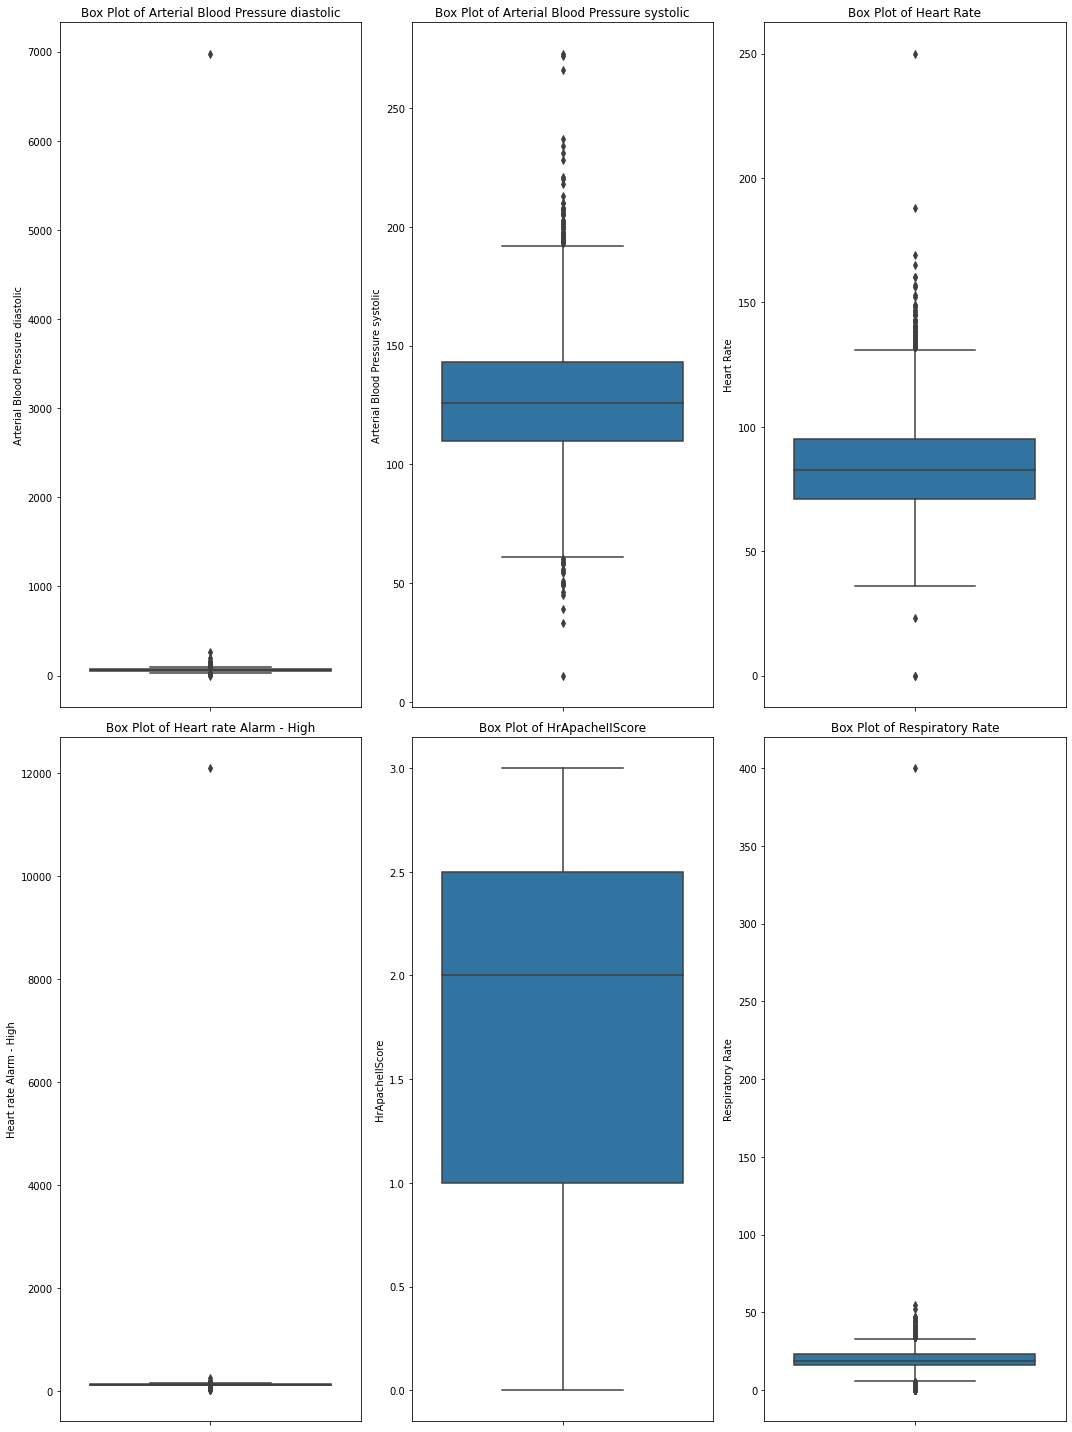

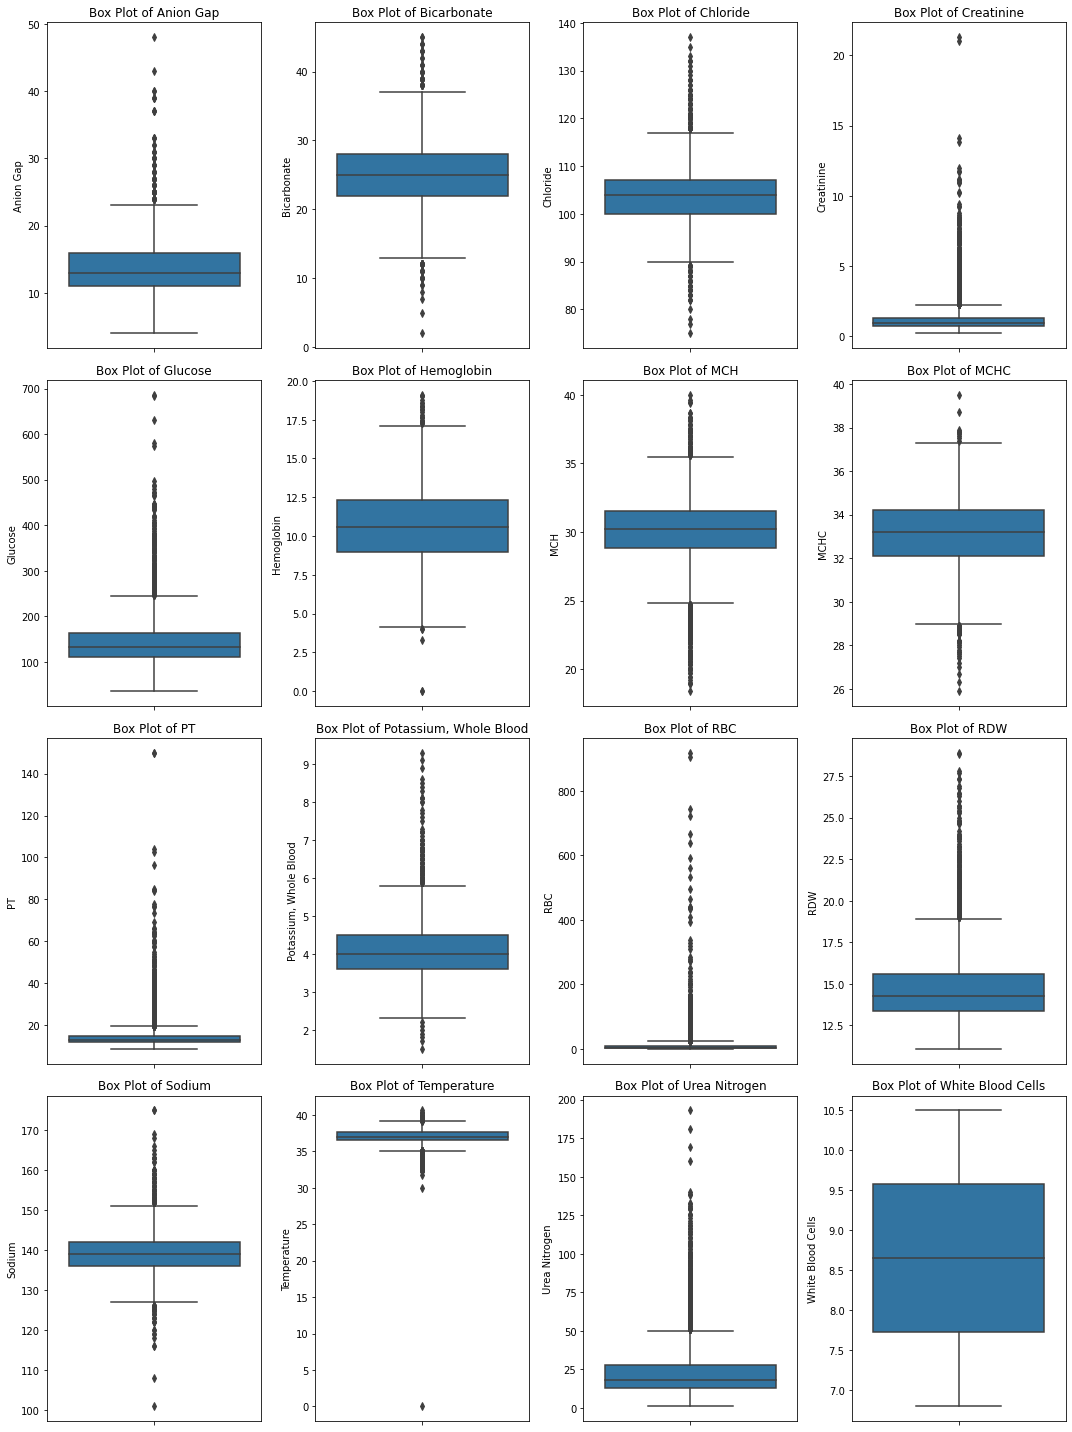

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to dynamically determine rows and cols for subplots
def determine_grid(num_plots):
    cols = int(np.ceil(np.sqrt(num_plots)))
    rows = int(np.ceil(num_plots / cols))
    return rows, cols

# Clinic Data
num_plots = len(df_merged_clinic.columns) - 3  # Minus subject_id, gender, and age
rows, cols = determine_grid(num_plots)

fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.ravel()  # Flattening to easily iterate

for index, column in enumerate(df_merged_clinic.columns[3:]):
    sns.boxplot(y=df_merged_clinic[column], ax=axes[index])
    axes[index].set_title(f'Box Plot of {column}')

# Remove any unused subplots
for idx in range(num_plots, rows*cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Similarly for Lab Data
num_plots = len(df_merged_lab.columns) - 3
rows, cols = determine_grid(num_plots)

fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.ravel()

for index, column in enumerate(df_merged_lab.columns[3:]):
    sns.boxplot(y=df_merged_lab[column], ax=axes[index])
    axes[index].set_title(f'Box Plot of {column}')

for idx in range(num_plots, rows*cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


From the above box plots, we can see that there are many outliers. Hence, we will replace outliers with NA. We are not removing outliers because if will result in lack of data (around 3000 will be removed, and only 3000 left for clinic, and all data will be removed for lab) and inconsistency for lab data and clinic data. 

### outlier deletion with IQR

In [48]:
df_merged_lab

,subject_id,gender,age,Anion Gap,Bicarbonate,Chloride,Creatinine,Glucose,Hemoglobin,MCH,MCHC,PT,"Potassium, Whole Blood",RBC,RDW,Sodium,Temperature,Urea Nitrogen,White Blood Cells
0,18487334,M,68,20.0,23.0,101.0,0.8,117.0,NaN,32.1,33.2,11.4,3.4,1.0,12.0,138.0,36.8,13.0,6.8
1,16233087,M,71,15.0,25.0,101.0,1.4,282.0,9.0,29.0,32.2,12.8,4.9,2.0,16.2,137.0,36.9,41.0,10.5
2,10013643,F,79,14.0,24.0,106.0,0.6,83.0,11.7,28.6,32.3,10.9,3.7,0.0,15.0,139.0,36.9,16.0,NaN
3,10055235,M,31,10.0,22.0,97.0,0.4,100.0,NaN,28.8,31.6,12.2,3.9,1.0,15.2,134.0,NaN,15.0,NaN
4,10236108,M,64,13.0,20.0,108.0,0.8,NaN,NaN,31.0,32.4,12.6,3.9,66.0,12.0,146.0,37.1,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6177,17653194,F,54,13.0,27.0,106.0,0.4,128.0,12.5,32.8,33.2,NaN,3.6,NaN,13.6,142.0,NaN,9.0,NaN
6178,18686436,F,50,10.0,18.0,107.0,0.7,NaN,NaN,27.9,31.6,NaN,NaN,NaN,12.9,140.0,NaN,12.0,NaN
6179,10501044,F,64,15.0,38.0,103.0,1.1,143.0,12.3,33.2,34.4,NaN,5.2,8.0,13.3,138.0,NaN,12.0,NaN
6180,13244557,F,68,10.0,24.0,107.0,1.0,NaN,NaN,26.8,29.9,NaN,NaN,NaN,15.4,144.0,NaN,20.0,NaN


In [49]:
def remove_outliers_columnwise(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Only replace values outside bounds with NaN for now
    for col in df.columns:
        df[col] = df[col].where((df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col]), np.nan)

    return df

# Extract the lab item columns
lab_items = df_merged_lab.iloc[:, 3:].copy()
clinic_items = df_merged_clinic.iloc[:, 3:].copy()


# Remove outliers column-wise
lab_items_clean = remove_outliers_columnwise(lab_items)
clinic_items_clean = remove_outliers_columnwise(clinic_items)


# Merge back the cleaned lab items with the original demographic columns
df_merged_lab_clean = pd.concat([df_merged_lab.iloc[:, :3], lab_items_clean], axis=1)
df_merged_clinic_clean = pd.concat([df_merged_clinic.iloc[:, :3], lab_items_clean], axis=1)


In [50]:
df_merged_lab_clean

,subject_id,gender,age,Anion Gap,Bicarbonate,Chloride,Creatinine,Glucose,Hemoglobin,MCH,MCHC,PT,"Potassium, Whole Blood",RBC,RDW,Sodium,Temperature,Urea Nitrogen,White Blood Cells
0,18487334,M,68,20.0,23.0,101.0,0.8,117.0,NaN,32.1,33.2,11.4,3.4,1.0,12.0,138.0,36.8,13.0,6.8
1,16233087,M,71,15.0,25.0,101.0,1.4,NaN,9.0,29.0,32.2,12.8,4.9,2.0,16.2,137.0,36.9,41.0,10.5
2,10013643,F,79,14.0,24.0,106.0,0.6,83.0,11.7,28.6,32.3,10.9,3.7,0.0,15.0,139.0,36.9,16.0,NaN
3,10055235,M,31,10.0,22.0,97.0,0.4,100.0,NaN,28.8,31.6,12.2,3.9,1.0,15.2,134.0,NaN,15.0,NaN
4,10236108,M,64,13.0,20.0,108.0,0.8,NaN,NaN,31.0,32.4,12.6,3.9,NaN,12.0,146.0,37.1,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6177,17653194,F,54,13.0,27.0,106.0,0.4,128.0,12.5,32.8,33.2,NaN,3.6,NaN,13.6,142.0,NaN,9.0,NaN
6178,18686436,F,50,10.0,18.0,107.0,0.7,NaN,NaN,27.9,31.6,NaN,NaN,NaN,12.9,140.0,NaN,12.0,NaN
6179,10501044,F,64,15.0,NaN,103.0,1.1,143.0,12.3,33.2,34.4,NaN,5.2,8.0,13.3,138.0,NaN,12.0,NaN
6180,13244557,F,68,10.0,24.0,107.0,1.0,NaN,NaN,26.8,29.9,NaN,NaN,NaN,15.4,144.0,NaN,20.0,NaN


In [51]:
df_merged_clinic_clean

,subject_id,gender,age,Anion Gap,Bicarbonate,Chloride,Creatinine,Glucose,Hemoglobin,MCH,MCHC,PT,"Potassium, Whole Blood",RBC,RDW,Sodium,Temperature,Urea Nitrogen,White Blood Cells
0,18539548,M,85,20.0,23.0,101.0,0.8,117.0,NaN,32.1,33.2,11.4,3.4,1.0,12.0,138.0,36.8,13.0,6.8
1,19305113,M,51,15.0,25.0,101.0,1.4,NaN,9.0,29.0,32.2,12.8,4.9,2.0,16.2,137.0,36.9,41.0,10.5
2,18770897,F,54,14.0,24.0,106.0,0.6,83.0,11.7,28.6,32.3,10.9,3.7,0.0,15.0,139.0,36.9,16.0,NaN
3,10285325,M,69,10.0,22.0,97.0,0.4,100.0,NaN,28.8,31.6,12.2,3.9,1.0,15.2,134.0,NaN,15.0,NaN
4,10342123,M,81,13.0,20.0,108.0,0.8,NaN,NaN,31.0,32.4,12.6,3.9,NaN,12.0,146.0,37.1,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6181,19660100,F,68,17.0,23.0,110.0,0.5,NaN,NaN,32.6,34.0,NaN,NaN,NaN,13.7,143.0,NaN,9.0,NaN
6182,19917043,F,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6183,10103536,M,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6184,14813765,F,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


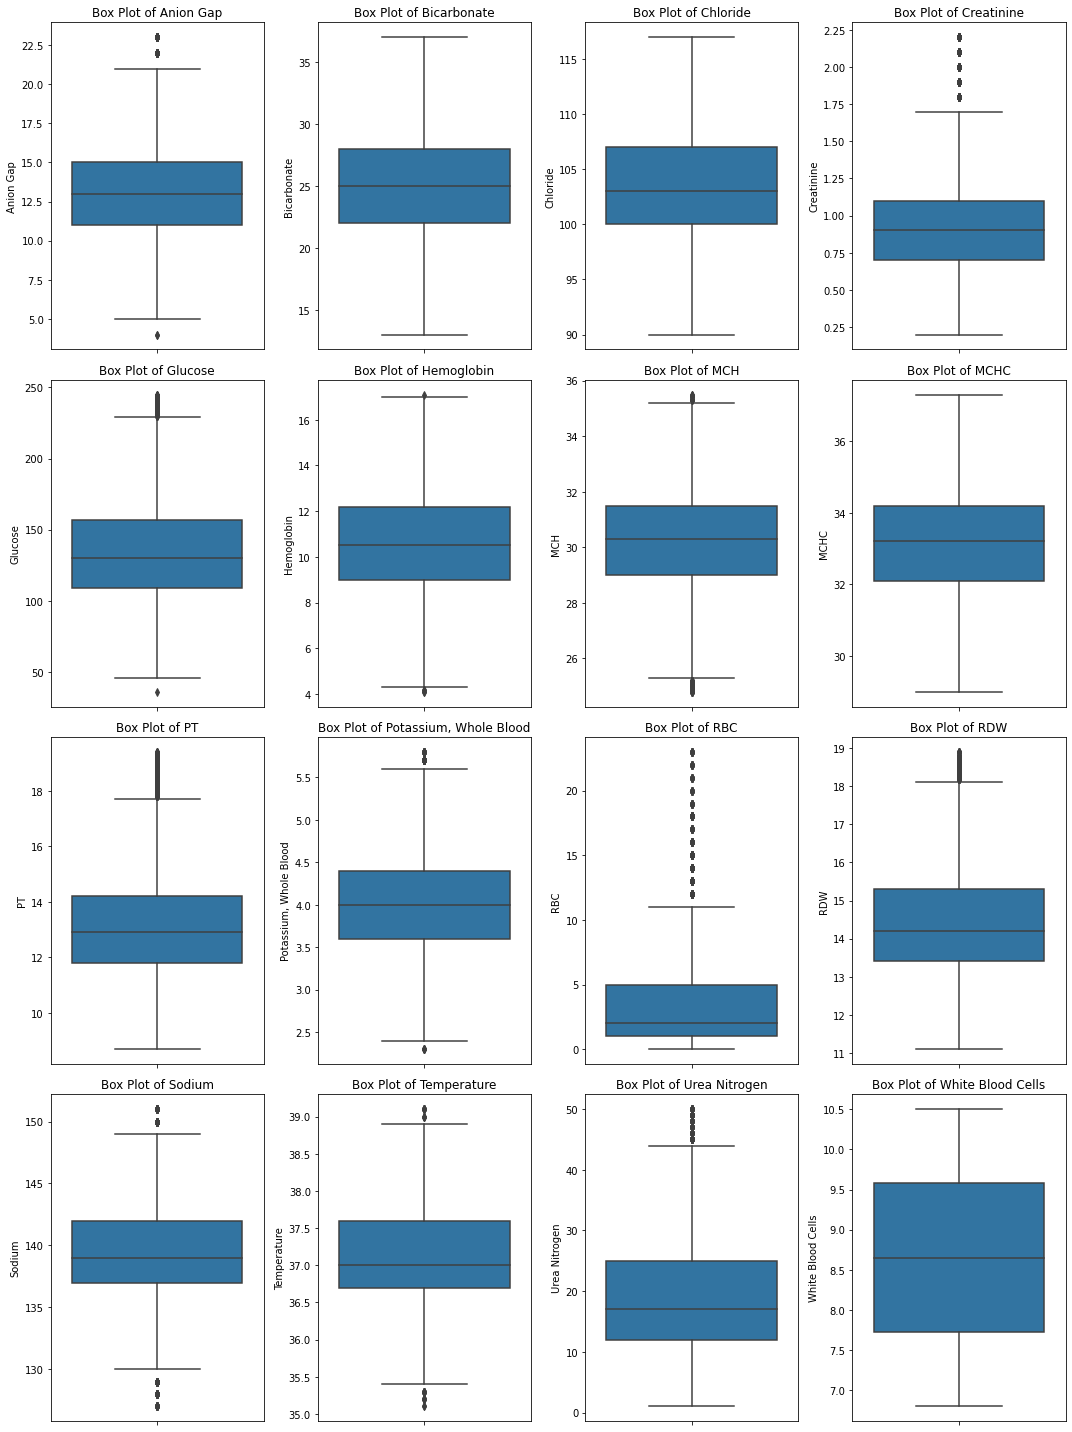

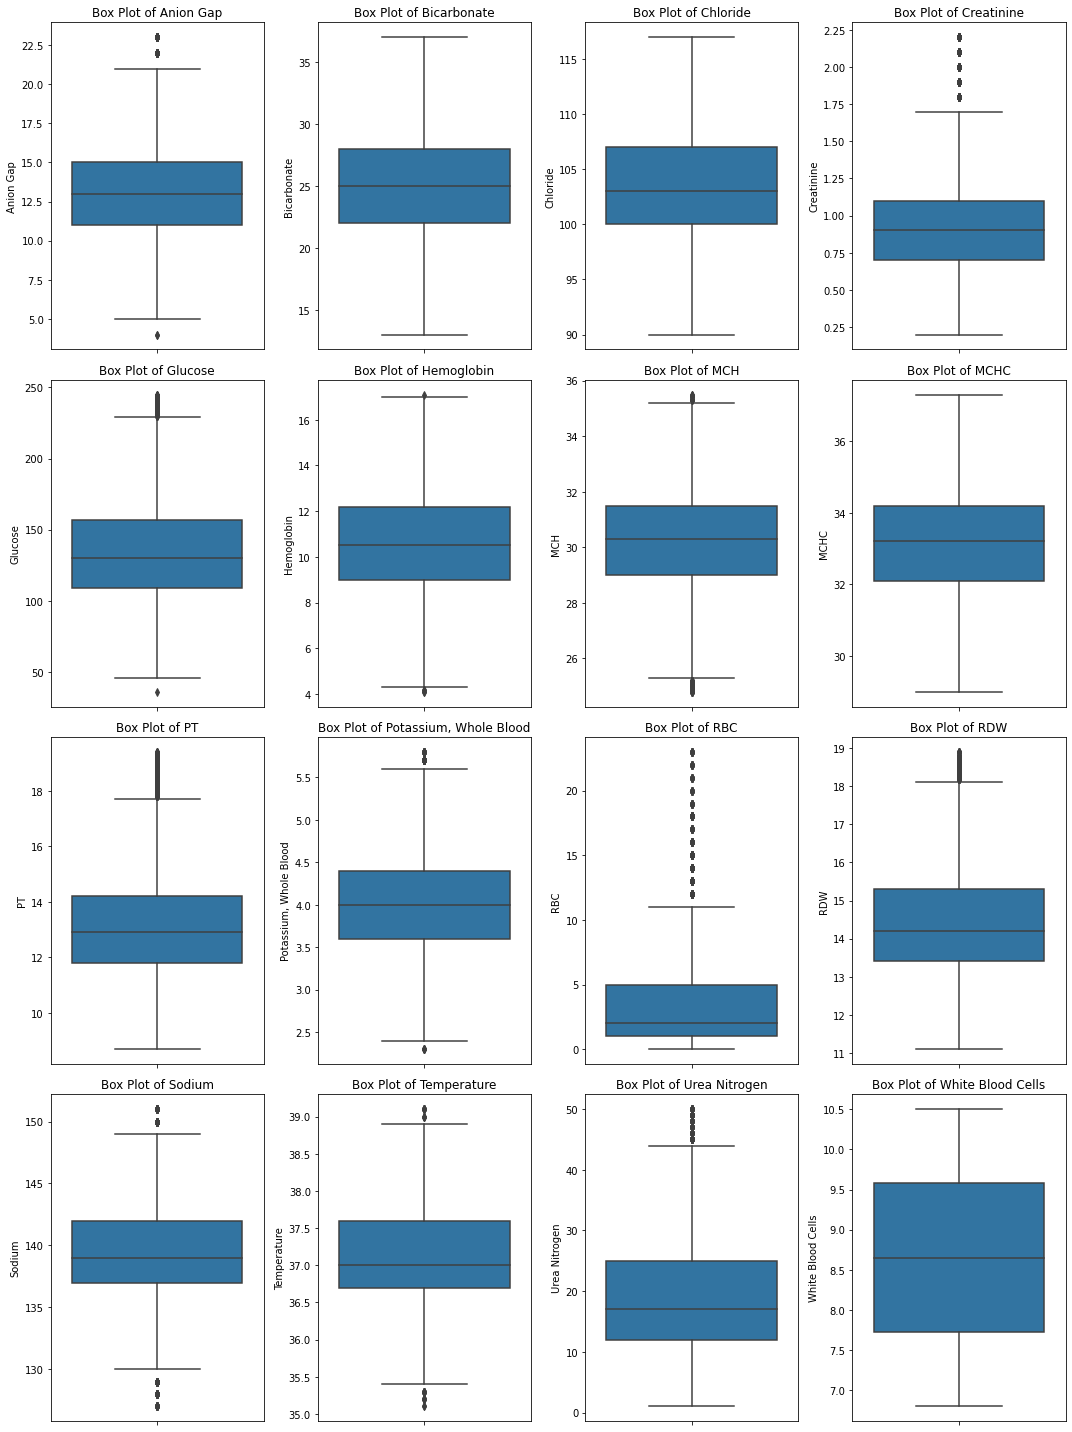

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to dynamically determine rows and cols for subplots
def determine_grid(num_plots):
    cols = int(np.ceil(np.sqrt(num_plots)))
    rows = int(np.ceil(num_plots / cols))
    return rows, cols

# Box Plots for Cleaned Clinic Data
num_plots = len(df_merged_clinic_clean.columns) - 3  # Minus subject_id, gender, and age
rows, cols = determine_grid(num_plots)

fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.ravel()  # Flattening to easily iterate

for index, column in enumerate(df_merged_clinic_clean.columns[3:]):
    sns.boxplot(y=df_merged_clinic_clean[column], ax=axes[index])
    axes[index].set_title(f'Box Plot of {column}')

# Remove any unused subplots
for idx in range(num_plots, rows*cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Box Plots for Cleaned Lab Data
num_plots = len(df_merged_lab_clean.columns) - 3
rows, cols = determine_grid(num_plots)

fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.ravel()

for index, column in enumerate(df_merged_lab_clean.columns[3:]):
    sns.boxplot(y=df_merged_lab_clean[column], ax=axes[index])
    axes[index].set_title(f'Box Plot of {column}')

for idx in range(num_plots, rows*cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


In [53]:
print("Missing values in Clinic Data:")
print(df_merged_clinic.isnull().sum())

Missing values in Clinic Data:
subject_id                              0
gender                                  0
age                                     0
Arterial Blood Pressure diastolic       0
Arterial Blood Pressure systolic        0
Heart Rate                              0
Heart rate Alarm - High                 2
HrApacheIIScore                      6183
Respiratory Rate                        3
dtype: int64


In [54]:
df_merged_clinic.columns

Index(['subject_id', 'gender', 'age', 'Arterial Blood Pressure diastolic',
       'Arterial Blood Pressure systolic', 'Heart Rate',
       'Heart rate Alarm - High', 'HrApacheIIScore', 'Respiratory Rate'],
      dtype='object')

In [55]:
# drop HrApacheIIScore and imupte with mean for Heart rate Alarm - High, and Respiratory Rate
if 'HrApacheIIScore' in df_merged_clinic.columns:
    df_merged_clinic.drop(columns=['HrApacheIIScore'], inplace=True)
# Impute missing values in "Heart rate Alarm - High" with its mean
df_merged_clinic['Heart rate Alarm - High'].fillna(df_merged_clinic['Heart rate Alarm - High'].median(), inplace=True)
# Impute missing values in "Respiratory Rate" with its mean
df_merged_clinic['Respiratory Rate'].fillna(df_merged_clinic['Respiratory Rate'].median(), inplace=True)


In [56]:
df_merged_clinic.isnull().sum()

subject_id                           0
gender                               0
age                                  0
Arterial Blood Pressure diastolic    0
Arterial Blood Pressure systolic     0
Heart Rate                           0
Heart rate Alarm - High              0
Respiratory Rate                     0
dtype: int64

In [57]:
print("\nMissing values in Lab Data:")
print(df_merged_lab.isnull().sum())


Missing values in Lab Data:
subject_id                   0
gender                       0
age                          0
Anion Gap                    0
Bicarbonate                  0
Chloride                     2
Creatinine                   0
Glucose                   1313
Hemoglobin                2153
MCH                         11
MCHC                        19
PT                          65
Potassium, Whole Blood    1171
RBC                       2540
RDW                         13
Sodium                       1
Temperature               3007
Urea Nitrogen                3
White Blood Cells         6180
dtype: int64


Drop white blood cells as 6180/6182 are missing, and Temperature(3007/6182) are missing

In [58]:
if 'White Blood Cells' in df_merged_lab.columns:
    df_merged_lab.drop(columns=['White Blood Cells'], inplace=True)

if 'Temperature' in df_merged_lab.columns:
    df_merged_lab.drop(columns=['Temperature'], inplace=True)


In [59]:
print(df_merged_lab.isnull().sum())


subject_id                   0
gender                       0
age                          0
Anion Gap                    0
Bicarbonate                  0
Chloride                     2
Creatinine                   0
Glucose                   1313
Hemoglobin                2153
MCH                         11
MCHC                        19
PT                          65
Potassium, Whole Blood    1171
RBC                       2540
RDW                         13
Sodium                       1
Urea Nitrogen                3
dtype: int64


For other columns, fill in with mean

In [60]:
# List of columns to fill missing values
cols_to_fill = ['Chloride', 'Glucose', 'Hemoglobin', 'MCH', 'MCHC', 'PT', 'Potassium, Whole Blood', 
                'RBC', 'RDW', 'Sodium', 'Urea Nitrogen']

for col in cols_to_fill:
    mean_value = df_merged_lab[col].median()
    df_merged_lab[col].fillna(mean_value, inplace=True)


In [61]:
print(df_merged_lab.isnull().sum())


subject_id                0
gender                    0
age                       0
Anion Gap                 0
Bicarbonate               0
Chloride                  0
Creatinine                0
Glucose                   0
Hemoglobin                0
MCH                       0
MCHC                      0
PT                        0
Potassium, Whole Blood    0
RBC                       0
RDW                       0
Sodium                    0
Urea Nitrogen             0
dtype: int64


### Up to here we've complete the following:
1. data transformation
2. replace outliers by NA using IQR
3. imputation with NA: 
    1. if too many missing (> 50%), remove the whole column
    2. filling with mean (as data are continuos)

### In the following section, we will:
1. data distribution visualisation
2. merge lab data with clinic data
3. further EDA
4. risk factor analysis, select significant features for ml modeling

###  Data Distribution Visualisation

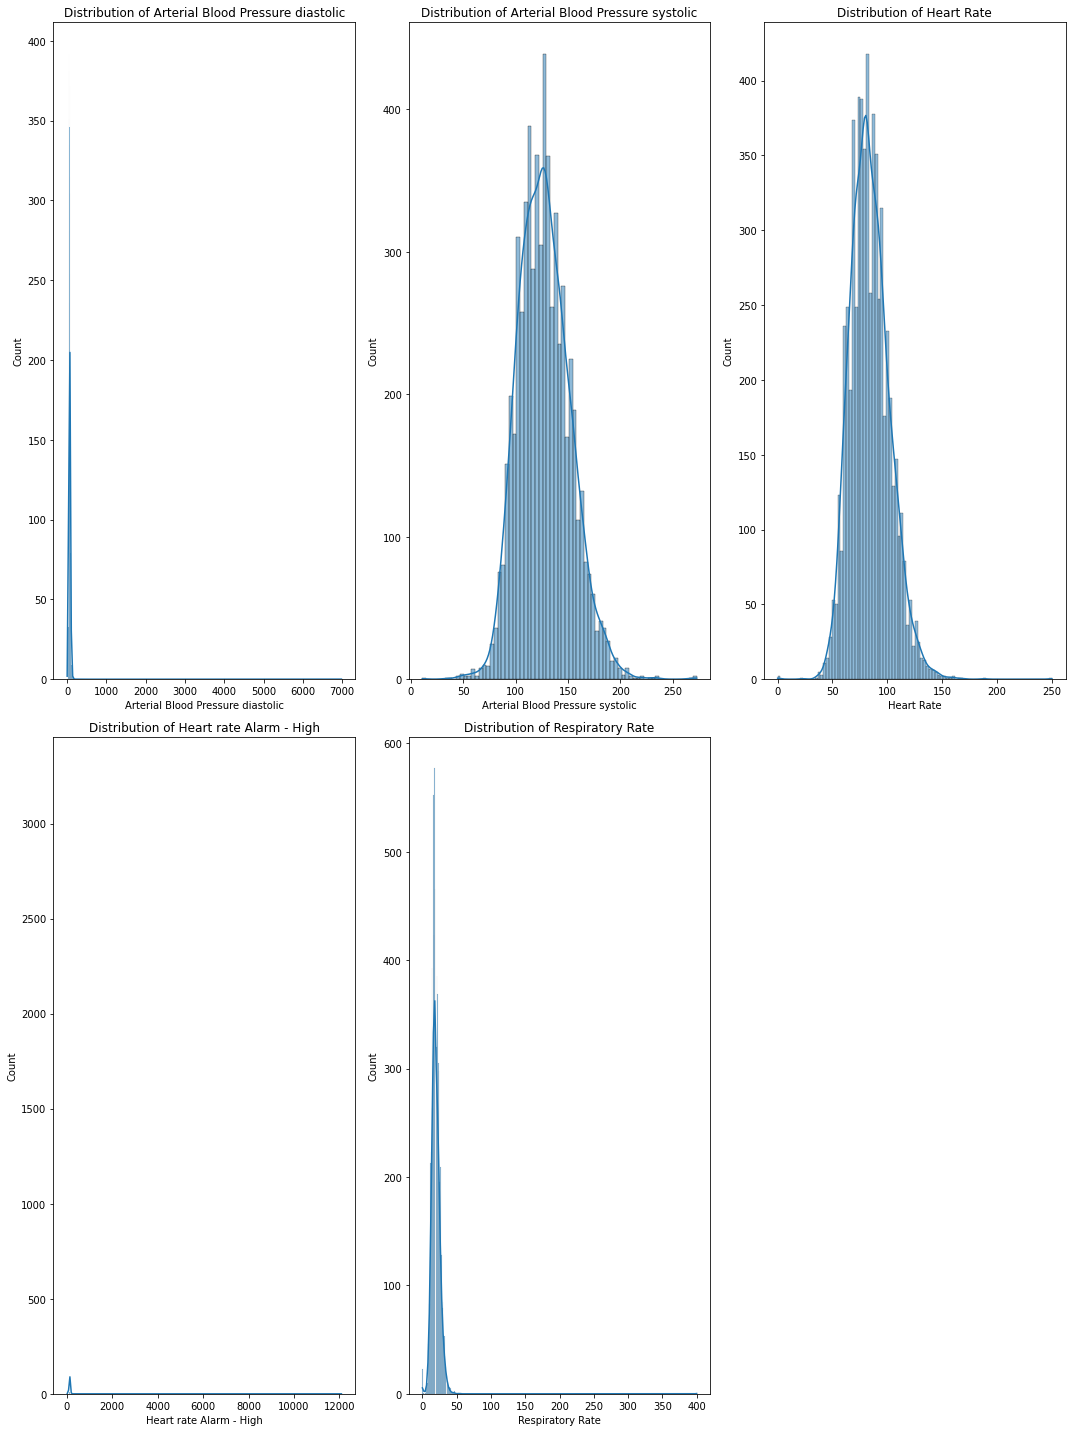

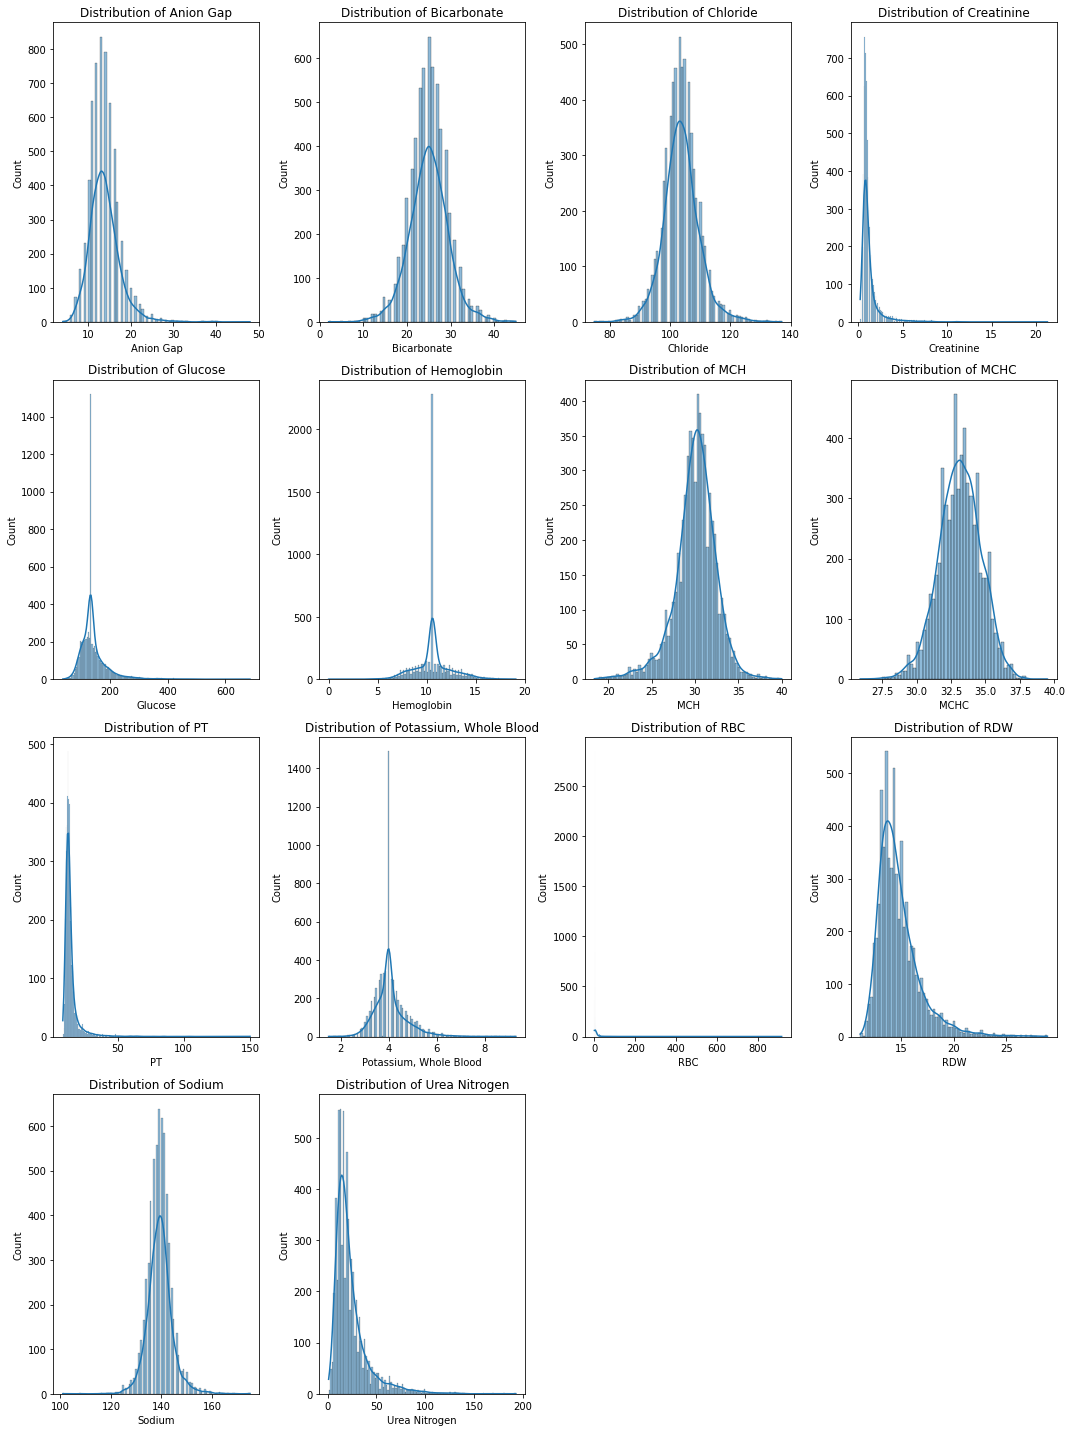

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to dynamically determine rows and cols for subplots
def determine_grid(num_plots):
    cols = int(np.ceil(np.sqrt(num_plots)))
    rows = int(np.ceil(num_plots / cols))
    return rows, cols

# Clinic Data
num_plots = len(df_merged_clinic.columns) - 3  # Minus subject_id, gender, and age
rows, cols = determine_grid(num_plots)

fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.ravel()  # Flattening to easily iterate

for index, column in enumerate(df_merged_clinic.columns[3:]):
    sns.histplot(df_merged_clinic[column], kde=True, ax=axes[index])
    axes[index].set_title(f'Distribution of {column}')

# Remove any unused subplots
for idx in range(num_plots, rows*cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Similarly for Lab Data
num_plots = len(df_merged_lab.columns) - 3
rows, cols = determine_grid(num_plots)

fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.ravel()

for index, column in enumerate(df_merged_lab.columns[3:]):
    sns.histplot(df_merged_lab[column], kde=True, ax=axes[index])
    axes[index].set_title(f'Distribution of {column}')

for idx in range(num_plots, rows*cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


### Comment:
As we can see, after our manipulation with the data (outlier removal, missing value imputation, etc.) most of the data demonstrate Gaussian distribution which indicates that are data is appropriate for further analysis.

### Correlation analysis (within features)

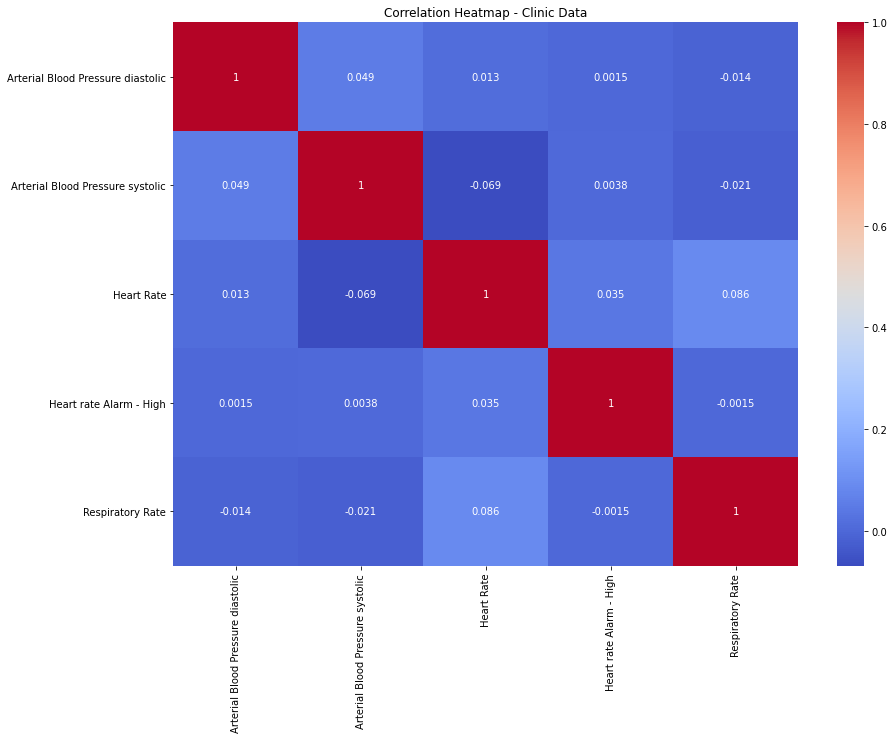

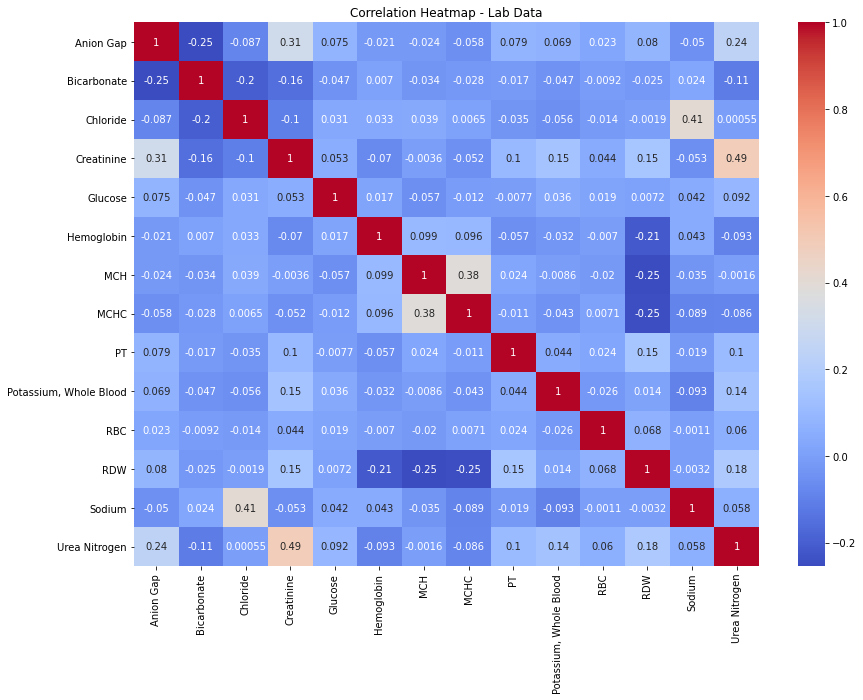

In [63]:
# Correlation heatmap for Clinic Data
plt.figure(figsize=(14, 10))
sns.heatmap(df_merged_clinic.iloc[:, 3:].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Clinic Data")
plt.show()

# Correlation heatmap for Lab Data
plt.figure(figsize=(14, 10))
sns.heatmap(df_merged_lab.iloc[:, 3:].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Lab Data")
plt.show()


Looks like little correlation between features

In [64]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is data frame with all the predictors
#df_merged_clinic.drop(columns=['gender', 'age'])
if 'gender' in df_merged_clinic.columns:
    df_merged_clinic.drop(columns=['gender', 'age'], inplace=True)
if 'gender' in df_merged_lab.columns:
    df_merged_lab.drop(columns=['age','gender'], inplace=True)
df_total = df_demographic.merge(df_merged_clinic, on="subject_id").merge(df_merged_lab, on="subject_id")

df = df_total
# Add a constant to the model (intercept)
df["Intercept"] = 1

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif_data)

                             Variable          VIF
0                          subject_id     1.003139
1                              gender     1.082441
2                                 dod     1.146557
3   Arterial Blood Pressure diastolic     1.008066
4    Arterial Blood Pressure systolic     1.021995
5                          Heart Rate     1.025439
6             Heart rate Alarm - High     1.009280
7                    Respiratory Rate     1.025240
8                           Anion Gap     1.212077
9                         Bicarbonate     1.168220
10                           Chloride     1.314164
11                         Creatinine     1.459107
12                            Glucose     1.030746
13                         Hemoglobin     1.083566
14                                MCH     1.246033
15                               MCHC     1.245501
16                                 PT     1.053307
17             Potassium, Whole Blood     1.053161
18                             

Interpreting VIF:

- A rule of thumb is that if VIF is above 5-10, then multicollinearity is high.
- VIF = 1 implies no multicollinearity.
- VIF between 1 and 5 implies moderate multicollinearity.

#### Comments:
In conclusion, based on the heat map and VIF values, multicollinearity doesn't appear to be a concern for our dataset. This is good news because it means that each variable brings its own unique information to the regression equation.

### Merge lab, clinic, and demographic data

In [65]:
#df_merged_clinic.drop(columns=['gender', 'age'])
if 'gender' in df_merged_clinic.columns:
    df_merged_clinic.drop(columns=['gender', 'age'], inplace=True)
if 'gender' in df_merged_lab.columns:
    df_merged_lab.drop(columns=['age','gender'], inplace=True)

In [66]:
df_total = df_demographic.merge(df_merged_clinic, on="subject_id").merge(df_merged_lab, on="subject_id")
df_total.columns

Index(['subject_id', 'gender', 'dod', 'Arterial Blood Pressure diastolic',
       'Arterial Blood Pressure systolic', 'Heart Rate',
       'Heart rate Alarm - High', 'Respiratory Rate', 'Anion Gap',
       'Bicarbonate', 'Chloride', 'Creatinine', 'Glucose', 'Hemoglobin', 'MCH',
       'MCHC', 'PT', 'Potassium, Whole Blood', 'RBC', 'RDW', 'Sodium',
       'Urea Nitrogen'],
      dtype='object')

### Correlation analysis (between features and mortality)
We will analyse correlation between features and mortality with following approach:
1. point-biserial correlation
2. logistic regression

based on the following criteria:

1. **Correlation Value (r)**:
    - It represents the strength and direction of the linear relationship between the feature and mortality.
    - A positive value suggests that as the feature value increases, the likelihood of mortality (`dod = 1`) also increases, and vice-versa.
    - A negative value suggests an inverse relationship: as the feature value increases, the likelihood of mortality decreases.
    - The magnitude of this correlation value (irrespective of its sign) tells about the strength of the relationship. Values closer to 1 or -1 represent stronger relationships.

2. **P-Value**:
    - It assesses the significance of the observed correlation. 
    - A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis. In other words, it suggests that the observed correlation is statistically significant and is unlikely due to random chance.
    - A large p-value (> 0.05) suggests that the observed correlation may be due to random chance.


#### Point-biserial correlation:

In [67]:
from scipy.stats import pointbiserialr

# List of continuous features from the datasets
features = [
    'Arterial Blood Pressure diastolic', 'Arterial Blood Pressure systolic', 'Heart Rate', 
    'Heart rate Alarm - High', 'Respiratory Rate', 'Anion Gap', 'Bicarbonate', 'Chloride', 
    'Creatinine', 'Glucose', 'Hemoglobin', 'MCH', 'MCHC', 'PT', 'Potassium, Whole Blood', 
    'RBC', 'RDW', 'Sodium', 'Urea Nitrogen'
]

# Calculate and print point-biserial correlation for each feature with 'dod'
for feature in features:
    pbc = pointbiserialr(df_total[feature], df_total['dod'])
    print(f"Correlation with mortality for {feature}: {pbc.correlation:.3f} (p={pbc.pvalue:.3e})")


Correlation with mortality for Arterial Blood Pressure diastolic: 0.002 (p=8.585e-01)
Correlation with mortality for Arterial Blood Pressure systolic: -0.047 (p=1.930e-04)
Correlation with mortality for Heart Rate: 0.040 (p=1.742e-03)
Correlation with mortality for Heart rate Alarm - High: 0.026 (p=4.086e-02)
Correlation with mortality for Respiratory Rate: 0.088 (p=4.427e-12)
Correlation with mortality for Anion Gap: 0.144 (p=5.103e-30)
Correlation with mortality for Bicarbonate: -0.104 (p=1.977e-16)
Correlation with mortality for Chloride: 0.071 (p=2.273e-08)
Correlation with mortality for Creatinine: 0.122 (p=8.206e-22)
Correlation with mortality for Glucose: 0.080 (p=3.803e-10)
Correlation with mortality for Hemoglobin: -0.018 (p=1.587e-01)
Correlation with mortality for MCH: 0.032 (p=1.232e-02)
Correlation with mortality for MCHC: -0.088 (p=4.374e-12)
Correlation with mortality for PT: 0.114 (p=2.735e-19)
Correlation with mortality for Potassium, Whole Blood: 0.013 (p=3.039e-01)
C

Based on our results:

- **Features with strong positive correlation with mortality**: (higher values of these might suggest higher mortality risk)
    - `Urea Nitrogen`: 0.235 
    - `RDW`: 0.211
    - `Anion Gap`: 0.144 
    - `Creatinine`: 0.122 
    - `PT`: 0.114 
    - (Others have smaller positive correlation values but are still statistically significant.)

- **Features with strong negative correlation with mortality**: (higher values of these might suggest lower mortality risk)
    - `Bicarbonate`: -0.104 
    - `MCHC`: -0.088

- **Statistically Non-Significant Features** (p > 0.05):
    - `Arterial Blood Pressure diastolic`: p=0.859 (Very weak correlation and not statistically significant.)
    - `Hemoglobin`: p=0.195
    - `Potassium, Whole Blood`: p=0.333 

It's essential to interpret these findings in a clinical context:

- For instance, a higher urea nitrogen level indicating a higher mortality risk makes sense because elevated levels often suggest kidney failure or other severe conditions.
- Similarly, a decreased bicarbonate level being associated with increased mortality also aligns with clinical expectations as it might suggest metabolic acidosis.


#### Logistic Regression:

In [68]:
import statsmodels.api as sm

X = df_total[features]
X = sm.add_constant(X)  # Adding a constant (intercept term)
y = df_total['dod']

model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.549471
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    dod   No. Observations:                 6182
Model:                          Logit   Df Residuals:                     6162
Method:                           MLE   Df Model:                           19
Date:                Wed, 20 Sep 2023   Pseudo R-squ.:                  0.1061
Time:                        13:57:15   Log-Likelihood:                -3396.8
converged:                       True   LL-Null:                       -3800.1
Covariance Type:            nonrobust   LLR p-value:                8.627e-159
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -12.2505      1.345     -9



### Interpretation:
From the output, some insights include:

1. **Significant Predictors**: Variables like 
    - `Arterial Blood Pressure systolic`, 
    - `Heart rate Alarm - High`, 
    - `Respiratory Rate`, 
    - `Anion Gap`, 
    - `Bicarbonate`, 
    - `Chloride`, 
    - `Glucose`, 
    - `Hemoglobin`, 
    - `MCH`, 
    - `MCHC`, 
    - `PT`, 
    - `RBC`, 
    - `RDW`, 
    - `Sodium`, and 
    - `Urea Nitrogen` 

    have p-values less than 0.05, suggesting they are significantly associated with mortality at the 5% significance level.

2. **Direction of Association**: For instance, the coefficient for `Anion Gap` is positive (0.0475), suggesting that higher values of `Anion Gap` are associated with higher odds of mortality. On the other hand, `Bicarbonate` has a negative coefficient (-0.0251), suggesting higher values are associated with lower odds of mortality.

3. **Insignificant Predictors**: Variables like 
    - `Arterial Blood Pressure diastolic`, 
    - `Heart Rate`, 
    - `Creatinine`, and 
    - `Potassium, Whole Blood` 
    
    have p-values above 0.05, suggesting they might not be significantly associated with mortality in this model. However, it doesn't mean these variables are not clinically significant, just that in the context of this model and dataset, they might not be statistically significant predictors.



## Conclusion

Based on the analyses performed, several features were found to be statistically insignificant in predicting mortality. We can classify these insignificant features based on two methods of evaluation:

### **1. Point-biserial Correlation:**
- `Arterial Blood Pressure diastolic`: 
  - Correlation: Very weak 
  - Significance: p=0.859
  
- `Hemoglobin`:
  - Significance: p=0.195
  
- `Potassium, Whole Blood`:
  - Significance: p=0.333 

### **2. Logistic Regression (LR):**
- `Arterial Blood Pressure diastolic`
- `Heart Rate`
- `Creatinine`
- `Potassium, Whole Blood`

Given these findings, we recommend excluding the following features from the machine learning modeling process:
- `Arterial Blood Pressure diastolic`
- `Hemoglobin`
- `Potassium, Whole Blood`
- `Heart Rate`
- `Creatinine`


In [69]:
columns_to_exclude = [
    'Arterial Blood Pressure diastolic',
    'Hemoglobin',
    'Potassium, Whole Blood',
    'Heart Rate',
    'Creatinine',
]


In [70]:
df_final = df_total.drop(columns=columns_to_exclude)
df_final

,subject_id,gender,dod,Arterial Blood Pressure systolic,Heart rate Alarm - High,Respiratory Rate,Anion Gap,Bicarbonate,Chloride,Glucose,MCH,MCHC,PT,RBC,RDW,Sodium,Urea Nitrogen
0,18539548,0,1,111.0,120.0,23.0,18.0,17.0,98.0,101.0,33.2,34.4,32.1,6.0,16.0,134.0,7.0
1,19305113,0,1,105.0,120.0,12.0,8.0,20.0,117.0,81.0,34.5,32.8,14.5,14.0,13.5,129.0,17.0
2,18770897,1,0,106.0,100.0,17.0,11.0,26.0,104.0,110.0,31.0,34.4,13.8,3.0,12.9,140.0,23.0
3,10285325,0,1,158.0,120.0,27.0,19.0,19.0,101.0,129.0,30.5,33.6,22.1,3.0,18.1,134.0,54.0
4,10342123,0,1,114.0,140.0,22.0,15.0,20.0,107.0,113.0,31.6,32.6,15.9,83.0,14.1,138.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6177,19660100,1,1,108.0,120.0,23.0,11.0,17.0,110.0,133.0,29.0,31.4,11.8,3.0,14.2,141.0,18.0
6178,19917043,1,0,117.0,120.0,17.0,17.0,24.0,104.0,122.0,26.7,31.6,11.9,3.0,13.6,135.0,17.0
6179,10103536,0,0,107.0,130.0,19.0,15.0,26.0,103.0,114.0,30.9,33.0,10.7,3.0,13.5,141.0,14.0
6180,14813765,1,0,139.0,130.0,19.0,14.0,24.0,101.0,158.0,30.1,33.0,11.5,3.0,12.6,142.0,15.0


In [71]:
df_final.to_csv('../data/df_final.csv')

In [72]:
df_final.describe()

,subject_id,gender,dod,Arterial Blood Pressure systolic,Heart rate Alarm - High,Respiratory Rate,Anion Gap,Bicarbonate,Chloride,Glucose,MCH,MCHC,PT,RBC,RDW,Sodium,Urea Nitrogen
count,6.182000e+03,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000
mean,1.500617e+07,0.422193,0.304594,127.384503,124.786477,19.493691,13.817373,25.015529,103.815917,142.422193,30.052782,33.130621,14.685634,10.842608,14.761631,139.308962,23.678259
std,2.884519e+06,0.493949,0.460272,24.732345,152.564441,7.523777,3.621039,4.519001,6.026562,50.136291,2.397594,1.539910,6.573870,39.254623,2.025005,4.989260,17.947870
min,1.000235e+07,0.000000,0.000000,11.000000,12.000000,0.000000,4.000000,2.000000,75.000000,36.000000,18.400000,25.900000,8.700000,0.000000,11.100000,101.000000,1.000000
25%,1.252421e+07,0.000000,0.000000,110.000000,120.000000,16.000000,11.000000,22.000000,100.000000,116.000000,28.900000,32.100000,11.900000,2.000000,13.400000,136.000000,13.000000
50%,1.502831e+07,0.000000,0.000000,126.000000,120.000000,19.000000,13.000000,25.000000,104.000000,133.000000,30.200000,33.200000,13.100000,3.000000,14.300000,139.000000,18.000000
75%,1.747863e+07,1.000000,1.000000,143.000000,130.000000,23.000000,16.000000,28.000000,107.000000,154.000000,31.500000,34.200000,14.900000,4.000000,15.600000,142.000000,28.000000
max,1.999944e+07,1.000000,1.000000,273.000000,12090.000000,400.000000,48.000000,45.000000,137.000000,686.000000,40.000000,39.500000,150.000000,918.000000,28.900000,175.000000,193.000000


In [73]:
len(df_final[df_final['dod']==1]) # alive

1883

In [74]:
len(df_final[df_final['dod']==0]) # dead

4299